In [1]:
from XrayTo3DShape import AttentionUnet, get_model, get_transform_from_model_name, get_dataset, VolumeAsInputExperiment, modify_checkpoint_keys
import torch
from torch.utils.data import DataLoader
import ipyvolume as ipv
import matplotlib.pyplot as plt

/mnt/SSD0/mahesh-home/miniconda3/envs/xrayto3dbenchmark-cuda_11/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /mnt/SSD0/mahesh-home/miniconda3/envs/xrayto3dbenchmark-cuda_11/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# load model checkpoint
model_path = '../runs/2d-3d-benchmark/yiw2kgep/checkpoints/epoch=60-step=2867-val_dice=0.85.ckpt'
checkpoint = torch.load(model_path)
checkpoint = modify_checkpoint_keys(checkpoint)
model_architecture = get_model(model_name=AttentionUnet.__name__, image_size=128)
model_architecture.load_state_dict(checkpoint["state_dict"], strict=False)


<All keys matched successfully>

In [3]:
# load sample data
test_datapath = '../test_data/totalsegmentation_hips_test.csv'
test_transform = get_transform_from_model_name(
    AttentionUnet.__name__, image_size=128, resolution=2.25
)

test_loader = DataLoader(
    get_dataset(test_datapath, transforms=test_transform),
    batch_size=1,
    num_workers=1,
    shuffle=False,
    drop_last=False,
)

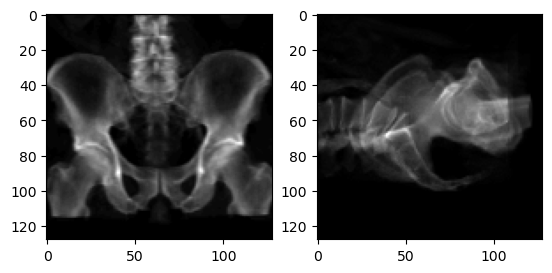

In [4]:
expt = VolumeAsInputExperiment(model_architecture)
for idx, item in enumerate(test_loader):
    input,seg = expt.get_input_output_from_batch(item)
    out = expt.predict_step(item,idx)
    pred, gt = out['pred'], out['gt']
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(input[0][0,0,0,:,:],cmap='gray')
    ax[1].imshow(input[0][0,1,:,:,0],cmap='gray')


In [5]:
fig = ipv.figure()
vol = ipv.volshow(pred[0,0])
ipv.show()

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.1, max=1.0, step…